In [1]:
import pickle,os
import numpy as np
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
sns.set()
sns.set(font_scale=2)
sns.set_context("talk")

from igraph import load
from osc_discovery.acquisition_function import get_F, linear_correct_to_b3lyp
from moviepy.editor import ImageSequenceClip

from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw

from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw.rdMolDraw2D import MolDrawOptions

#load graph file
g = load('../data/graph_molecular_testspace.graphml')
layout_coords=np.array([[node['x'],node['y']] for node in g.vs])
nodes_smiles = [node["smiles"] for node in g.vs]
generations = [int(node["generation"]) for node in g.vs]
utilities = [node["utility"] for node in g.vs]

# load molecular testspaced
df_chemical_space=pd.read_json('../data/df_chemical_space_chons_4rings.json',orient="split")
df_chemical_space['generation']=[int(x) for x in df_chemical_space.generation.tolist()]
df_chemical_space=df_chemical_space.sort_values(by='generation')
df_chemical_space_unique = df_chemical_space.copy().drop_duplicates(subset='molecule_smiles')
properties = ["XTB1_lamda_h", "ehomo_gfn1_b3lyp"]

for p in properties:
    df_chemical_space_unique[p]=[linear_correct_to_b3lyp(p,row[p]) for i,row in df_chemical_space_unique.iterrows()]

utility_functions = []
for i,row in df_chemical_space_unique.iterrows():
    util = get_F([row[p] for p in properties])
    utility_functions.append(util)
df_chemical_space_unique['utility_function']=utility_functions
    
print("Total in test space: {}".format(df_chemical_space_unique.shape[0]))
print("Favorable: {}".format(df_chemical_space_unique[df_chemical_space_unique['utility_function']>=-0.2].shape[0]))
print("Unfavorable: {}".format(df_chemical_space_unique[df_chemical_space_unique['utility_function']<-0.2].shape[0]))

RDKit WARNING: [19:13:39] Enabling RDKit 2019.09.3 jupyter extensions


Total in test space: 65552
Favorable: 2438
Unfavorable: 63114


In [3]:
def _MolsToGridSVG(mols, molsPerRow=3, subImgSize=(200, 200), legends=None, highlightAtomLists=None,
                   highlightBondLists=None, drawOptions=None, **kwargs):
  """ returns an SVG of the grid 
      Function taken from rdkit/rdkit/Chem/Draw/__init__.py 
      https://github.com/rdkit/rdkit
      Copyright (c) 2006-2015, Rational Discovery LLC, Greg Landrum, and Julie Penzotti and others
      All rights reserved.
  """
  if legends is None:
    legends = [''] * len(mols)

  nRows = len(mols) // molsPerRow
  if len(mols) % molsPerRow:
    nRows += 1

  blocks = [''] * (nRows * molsPerRow)

  fullSize = (molsPerRow * subImgSize[0], nRows * subImgSize[1])

  d2d = rdMolDraw2D.MolDraw2DSVG(fullSize[0], fullSize[1], subImgSize[0], subImgSize[1])
  print(d2d)
  if drawOptions is not None:
    d2d.SetFontSize(1.25)
  else:
    dops = d2d.drawOptions()
    for k, v in list(kwargs.items()):
      if hasattr(dops, k):
        setattr(dops, k, v)
        del kwargs[k]
  d2d.DrawMolecules(list(mols), legends=legends or None, highlightAtoms=highlightAtomLists or [],
                    highlightBonds=highlightBondLists or [], **kwargs)
  d2d.FinishDrawing()
  res = d2d.GetDrawingText()
  return res

# Figure 2

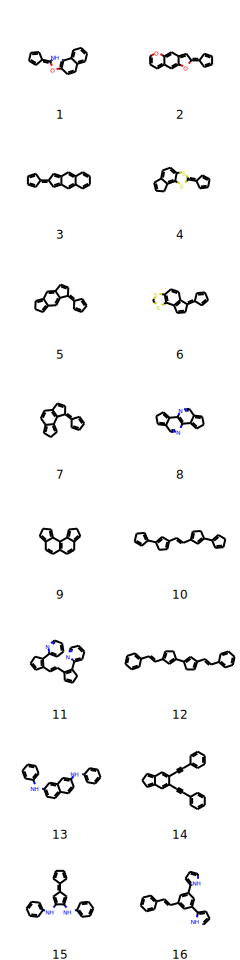

In [4]:
drawOptions=MolDrawOptions()
drawOptions.legendFontSize=14
drawOptions.scaleBondWidth=1

mols_selected_randomly_distributed=['C1=CC(=C2Nc3c(ccc4ccccc34)O2)C=C1', 
                                    'C1=COc2cc3cc(=C4C=CC=C4)oc3cc2=C1', 
                                    'C1=CC(=C2C=c3cc4ccccc4cc3=C2)C=C1', 
                                    'C1=CC(=C2Sc3ccc4c(c3S2)CC=C4)C=C1', 
                                    'C1=CC(=C2C=Cc3cc4c(cc32)=CCC=4)C=C1', 
                                    'C1=CC(=C2C=Cc3c2ccc2c3SCS2)C=C1', 
                                    'C1=CC(=C2C=Cc3ccc4c(c32)=CCC=4)C=C1', 
                                    'C1=c2cnc3c4c(cnc3c2=CC1)=CCC=4', 
                                    'C1=c2ccc3ccc4c(c3c2=CC1)=CCC=4', 
                                    'C1=CC(C2=CC(C=CC3=CCC(C4=CCC=C4)=C3)=CC2)=CC1', 
                                    'C1=CC(C=CC2=C(c3ccccn3)CC=C2)=C(c2ccccn2)C1', 
                                    'C(=Cc1ccccc1)C1=CCC(C2=CC(C=Cc3ccccc3)=CC2)=C1', 
                                    'c1ccc(Nc2ccc3ccc(Nc4ccccc4)cc3c2)cc1', 
                                    'C(#Cc1cc2c(cc1C#Cc1ccccc1)=CCC=2)c1ccccc1', 
                                    'C1=CC(=C2C=C(Nc3ccccc3)C(Nc3ccccc3)=C2)C=C1', 
                                    'C(=Cc1cc(-c2ccc[nH]2)cc(-c2ccc[nH]2)c1)c1ccccc1']



svg=_MolsToGridSVG([Chem.MolFromSmiles(x) for x in mols_selected_randomly_distributed],
                         legends=[str(i+1) for i in range(len(mols_selected_randomly_distributed))],
                         molsPerRow=2, subImgSize=(120, 120), drawOptions=drawOptions)

with open("main_figures/mols_examples.svg", "w") as filex:
    filex.write(svg)
SVG(svg)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000


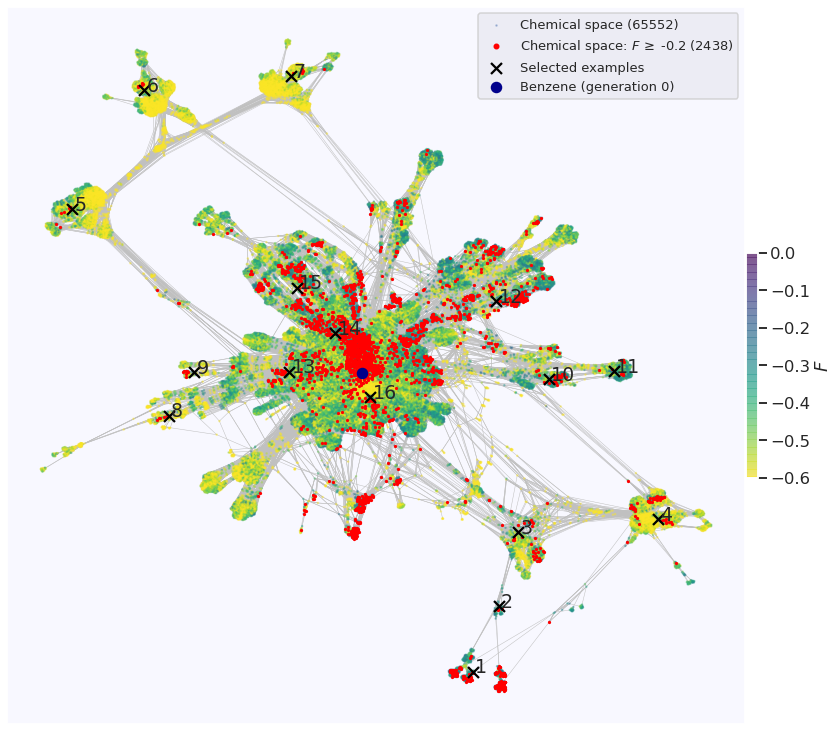

In [10]:
fig=plt.figure(figsize=(12,10.5))
plt.scatter( np.array(layout_coords)[:,0],np.array(layout_coords)[:,1], 
             s=1, alpha=0.4, c = df_chemical_space_unique['utility_function'], 
             cmap='viridis_r', label='Chemical space ({})'.format(df_chemical_space_unique.shape[0]))
fig.axes[-1].set_facecolor('ghostwhite')
cbar=plt.colorbar(fraction=0.015, pad=0.002)
plt.clim(-0.6,0.0)
cbar.set_label('$F$')

pos2_all=[]
for i,row in df_chemical_space_unique.iterrows():
    if row.utility_function>=-.2:
        pos2_all.append( np.array(layout_coords)[nodes_smiles.index(row.molecule_smiles)] )
    if row.molecule_smiles=='c1ccccc1':
        benz_pos = np.array(layout_coords)[nodes_smiles.index(row.molecule_smiles)]
plt.scatter(np.array(pos2_all)[:,0], np.array(pos2_all)[:,1], c='red', s=3, 
            label='Chemical space: $F\,\mathrm{\geq}$ -0.2'+' ({})'\
            .format(df_chemical_space_unique[df_chemical_space_unique['utility_function']>=-0.2].shape[0]))

coords=[]
for i,smi in enumerate(mols_selected_randomly_distributed):
    c = layout_coords[nodes_smiles.index(smi)]
    coords.append(c)
    plt.text(c[0]+130,c[1]-80, str(i+1), fontsize=19, zorder=3)
coords=np.array(coords)
plt.scatter( coords[:,0],coords[:,1], c='black', marker='x', s=120, label='Selected examples' )
plt.scatter( benz_pos[0], benz_pos[1], c='darkblue', s=100, label='Benzene (generation 0)' )

# Add connectors
drawLines = []
if True:
    for i,e in enumerate(g.es):
        if i%10000==0 and i>0: print(i);
        drawLines.append((e.source_vertex['x'],e.target_vertex['x']))
        drawLines.append((e.source_vertex['y'],e.target_vertex['y']))

plt.plot(*drawLines, c='silver', lw=0.5, zorder=0)
plt.xticks([],fontsize=11)
plt.yticks([],fontsize=11)
plt.subplots_adjust(left=0.14, right=0.97, top=0.97, bottom=0.1)
lgd=plt.legend(fontsize=13)
lgd.legendHandles[1].set_sizes([20])
plt.tight_layout()
plt.savefig('main_figures/network_chemspace_overview.png', dpi=300)
plt.show()

# Figure 3 and Videos

In [ ]:
def plot_graph(folder, max_pop=10, save_folder="."):

    """ Helper function to plot the graphs in Figure 3 """
    
    global df_chemical_space_unique
    
    # load necessary dataframes
    print("{}/df_initial.json".format(folder),folder)
    df_initial_population = pd.read_json('{}/df_initial.json'.format(folder),orient="split")  
    df_population_unique = pd.read_json('{}/df_population.json'.format(folder), orient='split')
    print('{}/df_population.json'.format(folder))
    res_dicts = pickle.load(open('{}/res_dicts.pkl'.format(folder),'rb'))
    print(df_population_unique.shape)
    print(res_dicts[-1])

    # settings
    n_batch = df_population_unique[df_population_unique.added_in_round==4].shape[0]
    size_point=1.

    field='utility_function'
    ip_field='ehomo_gfn1_b3lyp'
    lambda_field='XTB1_lamda_h'

    labelx='$\lambda_\mathrm{h}$ / meV'
    labely='$ϵ_\mathrm{HOMO}$ / eV'
    ip_wanted=-5.1
    threshold=-0.2

    # setup figure
    fig=plt.figure(figsize=(6,5.5))

    # plot in red useful compounds
    for i,row in df_chemical_space_unique.iterrows():
        if row.utility_function>=-.2:
            pos2 = np.array(layout_coords)[nodes_smiles.index(row.molecule_smiles)]
            plt.scatter( pos2[0], pos2[1], c='red', s=size_point, zorder=2 )
    plt.scatter( pos2[0], pos2[1], c='red', s=size_point, zorder=2, label='Target molecules ({})'\
                         .format(df_chemical_space_unique[df_chemical_space_unique['utility_function']>=-0.2].shape[0]) ) 
    
    fig.axes[-1].set_facecolor('ghostwhite')
    n_initial = 2
    n_start = -1
    n_end = max_pop+n_initial
    print(n_start, n_end)
    color = 'blue'
    df_sel_curr_pop = df_population_unique[(df_population_unique.added_in_round>n_start) \
                                  & (df_population_unique.added_in_round<=n_end)]
    df_sel_fav = df_sel_curr_pop[df_sel_curr_pop.utility_function>=-0.2]
    
    if df_sel_fav.shape[0]>0:
        points_mark = list(set(df_sel_fav.molecule_smiles.tolist()))
        pos = np.array([np.array(layout_coords)[nodes_smiles.index(x)] for x in points_mark])
        plt.scatter(pos[:,0],pos[:,1], s=size_point, c=color,zorder=3, alpha=1)
        plt.scatter(pos[-1, 0],pos[-1, 1], s=size_point, c=color,zorder=3, alpha=1, 
                    label='Identified molecules ({})'.format(df_sel_fav.shape[0]))
    
    if os.path.isfile(os.path.join(folder, 'log_candidates', 'df_candidates_{}.json'.format(n_end+1))):        
        color='dimgray'
        pos_all=[]
        df_can = pd.read_json(os.path.join(folder, 'log_candidates', 'df_candidates_{}.json'.format(n_end+1)), orient='split')
        df_can = df_can.drop_duplicates(subset='molecule_smiles')
        df_can = df_can[~df_can.molecule_smiles.isin(df_sel_curr_pop.molecule_smiles)]
        for i,row in df_can.iterrows():
            pos_all.append(np.array(layout_coords)[nodes_smiles.index(row.molecule_smiles)])
        pos_all=np.array(pos_all)
        plt.scatter( pos_all[:,0], pos_all[:,1], c=color, s=size_point, zorder=1)
        plt.scatter( pos_all[-1,0], pos_all[-1,1], c=color, s=size_point, zorder=1, 
                     label='Search space size ({})'.format(df_can.shape[0]) )

    plt.xticks([])
    plt.yticks([])
    plt.subplots_adjust(left=0.14, right=0.97, top=0.97, bottom=0.1)
    legend_title='Learning step $n$ = '+'{}\n'.format(n_end-2)+'Population size $N$ = {}'.format(df_sel_curr_pop.shape[0])
    leg=plt.legend(fontsize=14.5, framealpha=0.4, loc='lower left', title=legend_title, 
                   labelspacing=0.2, title_fontsize=14.5, handletextpad=0.25, markerscale=4)   
    leg._legend_box.align = "left"

    drawLines = []
    if True:
        for i,e in enumerate(g.es):
            drawLines.append((e.source_vertex['x'],e.target_vertex['x']))
            drawLines.append((e.source_vertex['y'],e.target_vertex['y']))
        plt.plot(*drawLines, c='silver', lw=0.5, zorder=0)

    plt.tight_layout()
    plt.savefig(os.path.join(save_folder, "{}.png".format(max_pop) ), dpi=600)
    plt.show()

In [6]:
# Video and images for 1G, 2G and reduced search space
# note, that the rendering of single images can take a few hours

#source_folder="../data/runs_1G/active_learner_results_script_twofold_0_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_0_suffix_/"
#save_folder="main_figures/movie_1G/"
#save_video_file="main_figures/upper_panel_trajectory_onefold_morphing_nbatch100_kappa25.mp4"

#source_folder="../data/runs_2G/active_learner_results_script_twofold_1_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_0_suffix_/"
#save_folder="main_figures/movie_2G/"
#save_video_file="main_figures/middle_panel_trajectory_twofold_morphing_nbatch100_kappa25.mp4"

source_folder="../data/runs_decreased_search_space/active_learner_results_script_twofold_0_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_1-3-500_suffix_r42/"
save_folder="main_figures/movie_reduced_search_space/"
save_video_file="main_figures/lower_panel_trajectory_nbatch100_kappa25_dsearch3_Ndeep500.mp4"

def plot_graph_helper(i):
    global save_folder, source_folder
    plot_graph(source_folder, max_pop=i, save_folder=save_folder)    

pool = mp.Pool(processes=26)
new_frames_all = pool.map( plot_graph_helper, list(range(51)) )
pool.close()

filenames=np.array([os.path.join(save_folder,x) for x in os.listdir(save_folder) if '.png' in x])
idxs=np.array([ float(x.split('.png')[0]) for x in os.listdir(save_folder) if '.png' in x ])
idxs_sorted=np.argsort(idxs)
filenames_sorted=filenames[idxs_sorted]
print(filenames_sorted)

clip = ImageSequenceClip(list(filenames_sorted), fps=1.25)
clip.write_videofile(save_video_file, fps=24)

../data/runs_decreased_search_space/active_learner_results_script_twofold_0_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_1-3-500_suffix_r42//df_initial.json../data/runs_decreased_search_space/active_learner_results_script_twofold_0_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_1-3-500_suffix_r42//df_initial.json../data/runs_decreased_search_space/active_learner_results_script_twofold_0_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_1-3-500_suffix_r42//df_initial.json../data/runs_decreased_search_space/active_learner_results_script_twofold_0_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_1-3-500_suffix_r42//df_initial.json../data/runs_decreased_search_space/active_learner_results_script_twofold_0_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_1-3-500_suffix_r42//df_initial.json    ../data/runs_decreased_search_space/active_learner_results_script_twofold_0_kappa_2.5_nbatch_100_runs_50_production_False_rwssearch_1-3-500_suffix_r42/../data/ru

# Figure 4

Completed (1680, 15)
Completed, above -0.2 900, 53.57142857142857%
Initial (215, 15)
Step 0 Step internal 1 (215, 15) -0.1511725296 -0.5952754389
Median Natoms: 42.0
Step 1 Step internal 2 (99, 15) -0.1014119084 -0.211446559
Median Natoms: 67.0
Step 2 Step internal 3 (98, 15) -0.10626865810000001 -0.2309059578
Median Natoms: 75.0
Step 3 Step internal 4 (99, 15) -0.09474425360000001 -0.2323475881
Median Natoms: 69.0
Step 4 Step internal 5 (98, 15) -0.0744622649 -0.20811328075000002
Median Natoms: 90.0
Step 5 Step internal 6 (100, 15) -0.07600989 -0.21819762655000002
Median Natoms: 85.0
Step 6 Step internal 7 (98, 15) -0.09094812840000001 -0.18862287095000002
Median Natoms: 90.0
Step 7 Step internal 8 (97, 15) -0.0836120458 -0.192451288
Median Natoms: 89.0
Step 8 Step internal 9 (89, 15) -0.0832488517 -0.2052458895
Median Natoms: 95.0
Step 9 Step internal 10 (100, 15) -0.0766459718 -0.1894627359
Median Natoms: 84.0
Step 10 Step internal 11 (99, 15) -0.0665072394 -0.1285058559
Median Nato

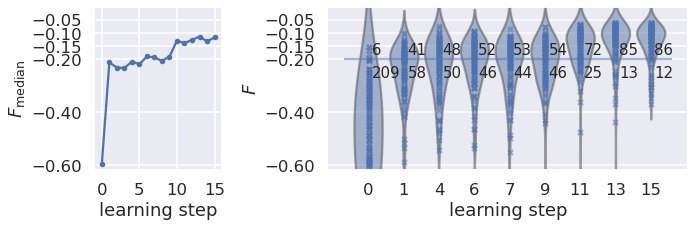

In [6]:
# Main Figure 4
df_population_production_main = pd.read_json("../data/df_population_b3lyp_run_main.json", orient="split")

PandasTools.AddMoleculeColumnToFrame(df_population_production_main, smilesCol='molecule_smiles')

ip_field='ehomo_gfn1_b3lyp'
lambda_field='XTB1_lamda_h'
field='utility_function'
labelx='$\lambda_\mathrm{h}$ / meV'
labely='$ϵ_\mathrm{HOMO}$ / eV'

df_population_production_main=df_population_production_main[df_population_production_main.calc_status=='completed']
print('Completed',df_population_production_main.shape)
n_above = df_population_production_main[df_population_production_main.utility_function>-.2].shape[0]
print('Completed, above -0.2 {}, {}%'.format(n_above, 100*n_above/df_population_production_main.shape[0]))

fig=plt.figure(figsize=(10,3.5))
ax=plt.subplot2grid((1,3),(0,0),rowspan=1, colspan=1)
df_sel=df_population_production_main[df_population_production_main.finished_in_round<=1]
print('Initial',df_sel.shape)
df_sel_extended=df_population_production_main[df_population_production_main.molecule_smiles==''].copy()

batches=[]
utility_functions=[]
utility_functions_ref=[]
best_mols=[]
best_mols_extended=[]
fizzled=0

for i in range(16):
    df_sel=df_population_production_main[df_population_production_main.finished_in_round==i+1]
    print("Step",i,"Step internal",i+1, df_sel.shape, df_sel.utility_function.max(), df_sel.utility_function.median())
    if i>0: fizzled+=(100-df_sel.shape[0])
    plt.scatter(i,df_sel.utility_function.median(), c='C0', s=16)
    utility_functions.append(df_sel.utility_function.median())
    batches.append(i)
    best_mols.append(df_sel.molecule_smiles.tolist()[np.argmax(df_sel.utility_function.tolist())])
    sorted_idx=np.flip(np.argsort(df_sel.utility_function.tolist()))
    best_mols_extended.extend([df_sel.molecule_smiles.tolist()[x] for x in sorted_idx[0:4]])
    
    df_sel=df_sel.sort_values(by='utility_function', ascending=False).iloc[0:4]
    df_sel_extended=pd.concat([df_sel_extended, df_sel])

    list_n_atoms_h=[]
    for i,row in df_sel.iterrows():
        m=deepcopy(row.ROMol)
        list_n_atoms_h.append(len([x for x in Chem.AddHs(m).GetAtoms()]))
    print("Median Natoms: {}".format(np.median(list_n_atoms_h)))
    
plt.plot(batches, utility_functions,c='C0')
plt.ylabel('$F_\mathrm{median}$')
plt.yticks([-0.6,-0.4,-0.2,-0.15,-0.1,-0.05])
plt.xticks([0,5,10,15])
plt.xlim(-1,16)
plt.xlabel('learning step')
plt.ylim(-0.62,-0.00)

bins_combined=np.flip([x*-0.05 for x in range(40) ])
print("Fizzled {}".format(fizzled))

##############
# Violin plot
ax=plt.subplot2grid((1,3),(0,1),rowspan=1, colspan=2)
utilities = []
steps=[0,1,4,6,7,9,11,13,15]
plt.xticks(steps)
plt.hlines(-0.2, -0.7, len(steps)-0.4)
for i in steps:
    df_sel=df_population_production_main[df_population_production_main.finished_in_round==i+1]
    utilities.append(df_sel.utility_function.tolist())
    
sns.violinplot(data = np.array(utilities), bw='silverman', orient='v', color='C0',
               scale='width', width=0.8,  inner=None)
plt.setp(ax.collections, alpha=0.5)

for i,step in enumerate(steps):
    df_sel=df_population_production_main[df_population_production_main.finished_in_round==step+1]
    utilities=df_sel.utility_function.tolist()
    plt.scatter([i]*len(utilities), utilities, s=25, marker='x', c='C0', alpha=0.5)

for i,step in enumerate(steps):
    df_sel = df_population_production_main[df_population_production_main.finished_in_round==step+1]
    plt.text(i+0.1, -0.18, str(df_sel[df_sel.utility_function>=-0.2].shape[0]), fontsize=15)
    plt.text(i+0.1, -0.27, str(df_sel[df_sel.utility_function<-0.2].shape[0]), fontsize=15)

plt.ylabel('$F$')
plt.xlabel('learning step')
plt.yticks([-0.6,-0.4,-0.2,-0.15,-0.1,-0.05])
plt.ylim(-0.62,0.0)
plt.xticks(list(range(len(steps))),[str(x) for x in steps])

plt.tight_layout()
plt.savefig('main_figures/dft_statistics.pdf')
plt.show()

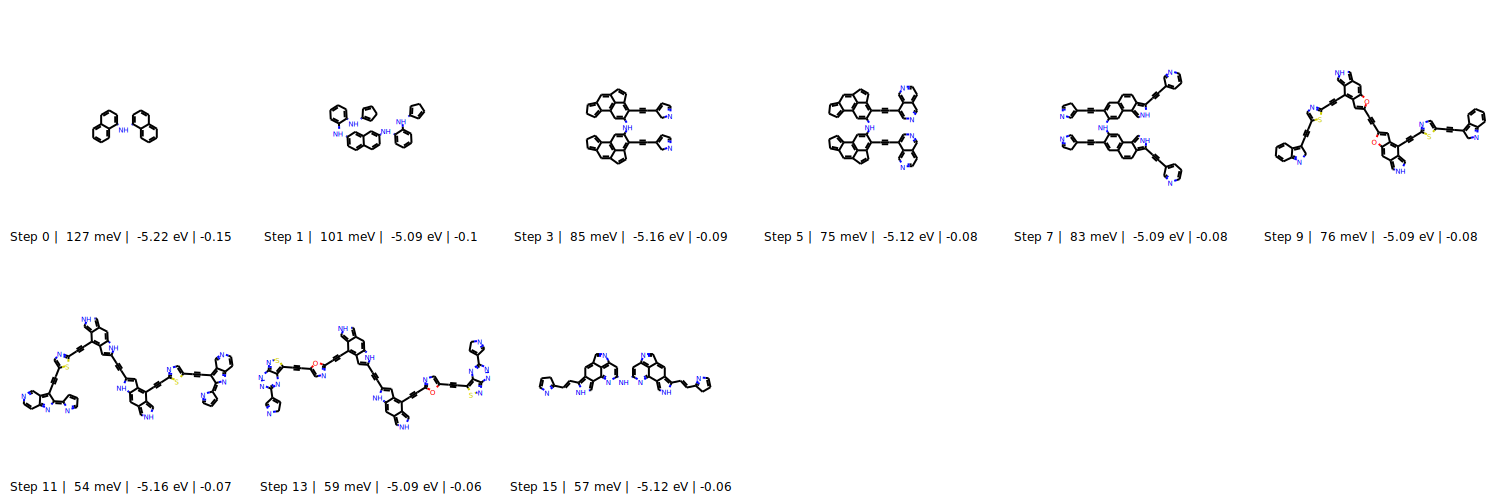

In [7]:
drawOptions=MolDrawOptions()
drawOptions.legendFontSize=14
drawOptions.scaleBondWidth=1

best_mols=[best_mols[i] for i in [0,1,3,5,7,9,11,13,15]]

df_max_mols=df_population_production_main[df_population_production_main.molecule_smiles.isin(best_mols)]

svg=_MolsToGridSVG(df_max_mols.ROMol.tolist(),
                         legends=['Step '+str(int(row[1].finished_in_round-1))+' |  '+\
                                          str(round(row[1].XTB1_lamda_h))+' meV'+' |  '+\
                                          str(round(row[1].ehomo_gfn1_b3lyp,2))+' eV'+' | '+\
                                          str(round(row[1].utility_function,2))
                                            for i,row in enumerate(df_max_mols.iterrows())],
                         molsPerRow=6, subImgSize=(250, 250), drawOptions=drawOptions)

with open("main_figures/best_mols_steps.svg", "w") as filex:
    filex.write(svg)
SVG(svg)

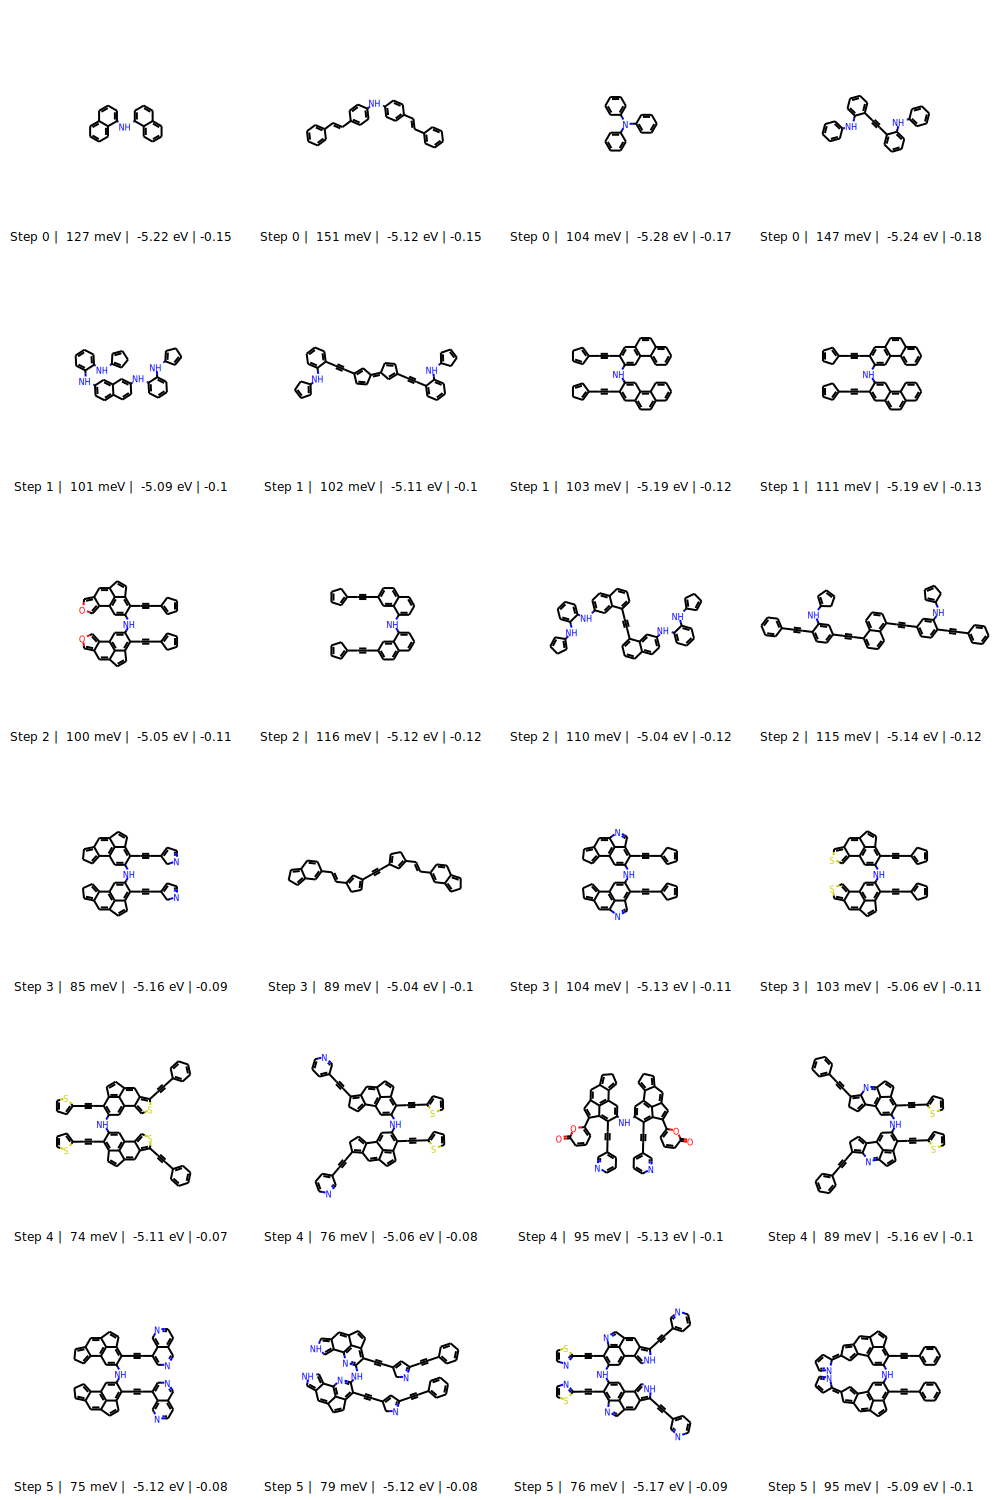

In [7]:
# Molecules Figure S9
idx=[0,24]
svg=_MolsToGridSVG(df_sel_extended.iloc[idx[0]:idx[1]].ROMol.tolist(),
                         legends=['Step '+str(int(row[1].finished_in_round-1))+' |  '+\
                                          str(round(row[1].XTB1_lamda_h))+' meV'+' |  '+\
                                          str(round(row[1].ehomo_gfn1_b3lyp,2))+' eV'+' | '+\
                                          str(round(row[1].utility_function,2))
                                            for i,row in enumerate(df_sel_extended.iloc[idx[0]:idx[1]].iterrows())],
                         molsPerRow=4, subImgSize=(250, 250), drawOptions=drawOptions)

with open("SI_figures/best_mols_steps_extended_1.svg", "w") as filex:
    filex.write(svg)
SVG(svg)

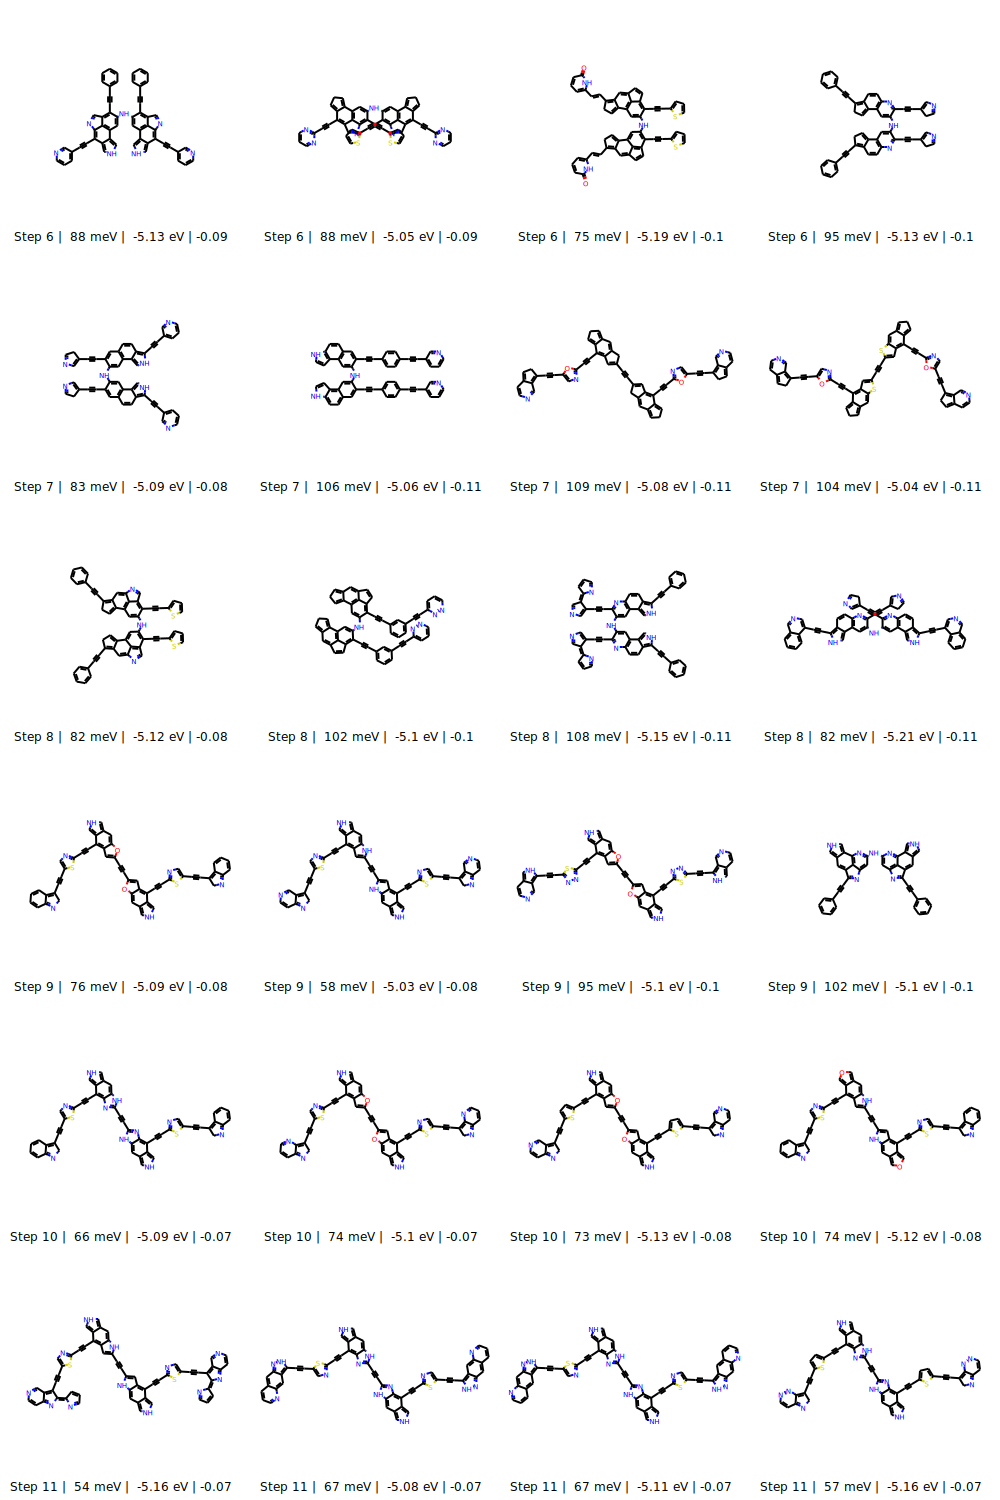

In [8]:
# Molecules Figure S9
idx=[24,48]
svg=_MolsToGridSVG(df_sel_extended.iloc[idx[0]:idx[1]].ROMol.tolist(),
                         legends=['Step '+str(int(row[1].finished_in_round-1))+' |  '+\
                                          str(round(row[1].XTB1_lamda_h))+' meV'+' |  '+\
                                          str(round(row[1].ehomo_gfn1_b3lyp,2))+' eV'+' | '+\
                                          str(round(row[1].utility_function,2))
                                            for i,row in enumerate(df_sel_extended.iloc[idx[0]:idx[1]].iterrows())],
                         molsPerRow=4, subImgSize=(250, 250), drawOptions=drawOptions)

with open("SI_figures/best_mols_steps_extended_2.svg", "w") as filex:
    filex.write(svg)
SVG(svg)

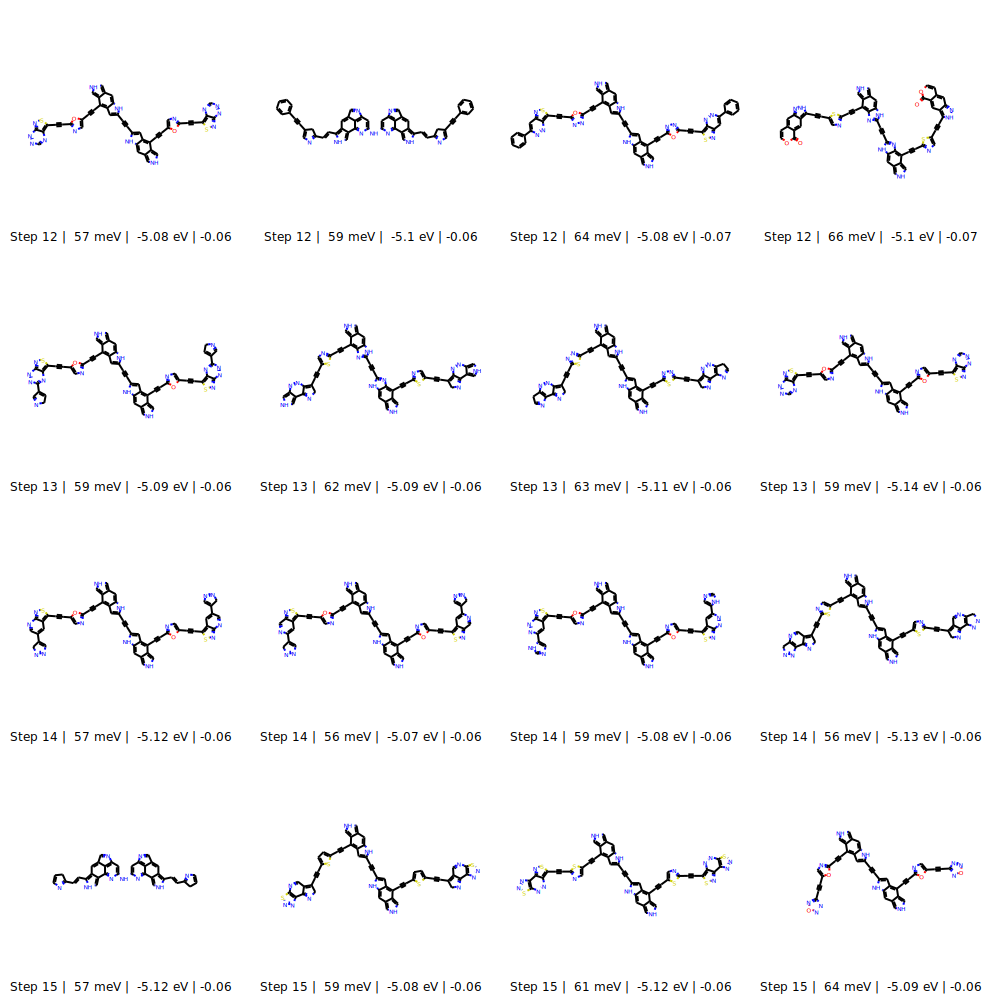

In [9]:
# Molecules Figure S9
idx=[48,64]
svg=_MolsToGridSVG(df_sel_extended.iloc[idx[0]:idx[1]].ROMol.tolist(),
                         legends=['Step '+str(int(row[1].finished_in_round-1))+' |  '+\
                                          str(round(row[1].XTB1_lamda_h))+' meV'+' |  '+\
                                          str(round(row[1].ehomo_gfn1_b3lyp,2))+' eV'+' | '+\
                                          str(round(row[1].utility_function,2))
                                            for i,row in enumerate(df_sel_extended.iloc[idx[0]:idx[1]].iterrows())],
                         molsPerRow=4, subImgSize=(250, 250), drawOptions=drawOptions)

with open("SI_figures/best_mols_steps_extended_3.svg", "w") as filex:
    filex.write(svg)
SVG(svg)

# Figure S9

Completed (1693, 13)
Completed, above -0.2 840, 49.616066154754876%, of 1693
Initial (215, 13)
Step 0 Step internal 1 (215, 15) -0.1511725296 -0.5952754389
Median Natoms: 42.0
Step 1 Step internal 2 (99, 15) -0.1014119084 -0.211446559
Median Natoms: 67.0
Step 2 Step internal 3 (98, 15) -0.10626865810000001 -0.2309059578
Median Natoms: 75.0
Step 3 Step internal 4 (99, 15) -0.09474425360000001 -0.2323475881
Median Natoms: 69.0
Step 4 Step internal 5 (98, 15) -0.0744622649 -0.20811328075000002
Median Natoms: 90.0
Step 5 Step internal 6 (100, 15) -0.07600989 -0.21819762655000002
Median Natoms: 85.0
Step 6 Step internal 7 (98, 15) -0.09094812840000001 -0.18862287095000002
Median Natoms: 90.0
Step 7 Step internal 8 (97, 15) -0.0836120458 -0.192451288
Median Natoms: 89.0
Step 8 Step internal 9 (89, 15) -0.0832488517 -0.2052458895
Median Natoms: 95.0
Step 9 Step internal 10 (100, 15) -0.0766459718 -0.1894627359
Median Natoms: 84.0
Step 10 Step internal 11 (99, 15) -0.0665072394 -0.1285058559
M

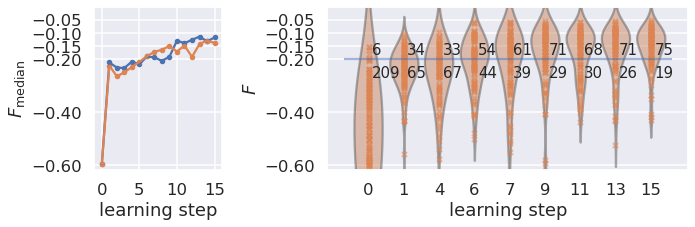

In [10]:
# SI Figure S9
df_population_production_SI = pd.read_json("../data/df_population_b3lyp_run_SI.json", orient="split")

PandasTools.AddMoleculeColumnToFrame(df_population_production_SI, smilesCol='molecule_smiles')

ip_field='ehomo_gfn1_b3lyp'
lambda_field='XTB1_lamda_h'
field='utility_function'
labelx='$\lambda_\mathrm{h}$ / meV'
labely='$ϵ_\mathrm{HOMO}$ / eV'

df_population_production_SI=df_population_production_SI[df_population_production_SI.calc_status=='completed']

print('Completed',df_population_production_SI.shape)
n_above= df_population_production_SI[df_population_production_SI.utility_function>-.2].shape[0]
print('Completed, above -0.2 {}, {}%, of {}'.format(n_above, 100*n_above/df_population_production_SI.shape[0], 
                                                    df_population_production_SI.shape[0]))

fig=plt.figure(figsize=(10,3.5))
ax=plt.subplot2grid((1,3),(0,0),rowspan=1, colspan=1)

df_sel=df_population_production_SI[df_population_production_SI.finished_in_round<=1]
print('Initial',df_sel.shape)
df_sel_extended=df_population_production_SI[df_population_production_SI.molecule_smiles==''].copy()


# Trace Figure 3 for comparison
batches=[]
utility_functions=[]
utility_functions_ref=[]
best_mols=[]
best_mols_extended=[]
for i in range(16):      
    df_sel=df_population_production_main[df_population_production_main.finished_in_round==i+1]
    print("Step",i,"Step internal",i+1, df_sel.shape, df_sel.utility_function.max(), df_sel.utility_function.median())
    plt.scatter(i,df_sel.utility_function.median(), c='C0', s=16)
    utility_functions.append(df_sel.utility_function.median())
    batches.append(i)
    best_mols.append(df_sel.molecule_smiles.tolist()[np.argmax(df_sel.utility_function.tolist())])
    sorted_idx=np.flip(np.argsort(df_sel.utility_function.tolist()))
    best_mols_extended.extend([df_sel.molecule_smiles.tolist()[x] for x in sorted_idx[0:4]])
    
    df_sel=df_sel.sort_values(by='utility_function', ascending=False).iloc[0:4]
    df_sel_extended=pd.concat([df_sel_extended, df_sel])

    list_n_atoms_h=[]
    for i,row in df_sel.iterrows():
        m=deepcopy(row.ROMol)
        list_n_atoms_h.append(len([x for x in Chem.AddHs(m).GetAtoms()]))
    print("Median Natoms: {}".format(np.median(list_n_atoms_h)))    
plt.plot(batches, utility_functions,c='C0')

# Trace Figure S9
batches=[]
utility_functions=[]
utility_functions_ref=[]
best_mols=[]
best_mols_extended=[]
fizzled=0
for i in range(16):      
    df_sel=df_population_production_SI[df_population_production_SI.finished_in_round==i+1]
    if i>0: fizzled+=(100-df_sel.shape[0])
    print("Step",i,"Step internal",i+1, df_sel.shape, df_sel.utility_function.max(), df_sel.utility_function.median())
    plt.scatter(i,df_sel.utility_function.median(), c='C1', s=16)
    utility_functions.append(df_sel.utility_function.median())
    batches.append(i)
    best_mols.append(df_sel.molecule_smiles.tolist()[np.argmax(df_sel.utility_function.tolist())])
    sorted_idx=np.flip(np.argsort(df_sel.utility_function.tolist()))
    best_mols_extended.extend([df_sel.molecule_smiles.tolist()[x] for x in sorted_idx[0:4]])
    
    df_sel=df_sel.sort_values(by='utility_function', ascending=False).iloc[0:4]
    df_sel_extended=pd.concat([df_sel_extended, df_sel])

    list_n_atoms_h=[]
    for i,row in df_sel.iterrows():
        m=deepcopy(row.ROMol)
        list_n_atoms_h.append(len([x for x in Chem.AddHs(m).GetAtoms()]))
    print("Median Natoms: {}".format(np.median(list_n_atoms_h)))
plt.plot(batches, utility_functions,c='C1')


plt.ylabel('$F_\mathrm{median}$')
plt.yticks([-0.6,-0.4,-0.2,-0.15,-0.1,-0.05])
plt.xticks([0,5,10,15])
plt.xlim(-1,16)
plt.xlabel('learning step')
plt.ylim(-0.62,-0.00)
bins_combined=np.flip([x*-0.05 for x in range(40) ])
print("Fizzled {}".format(fizzled))


##############
# Violin plot
ax=plt.subplot2grid((1,3),(0,1),rowspan=1, colspan=2)
utilities = []
steps=[0,1,4,6,7,9,11,13,15]
plt.xticks(steps)
plt.hlines(-0.2, -0.7, len(steps)-0.4)
for i in steps:
    df_sel=df_population_production_SI[df_population_production_SI.finished_in_round==i+1]
    utilities.append(df_sel.utility_function.tolist())
    
sns.violinplot(data = np.array(utilities), bw='silverman', orient='v', 
               color='C1', scale='width', width=0.8,  inner=None)
plt.setp(ax.collections, alpha=0.5)

for i,step in enumerate(steps):
    df_sel=df_population_production_SI[df_population_production_SI.finished_in_round==step+1]
    utilities=df_sel.utility_function.tolist()
    plt.scatter([i]*len(utilities), utilities, s=25, marker='x', c='C1', alpha=0.5)

for i,step in enumerate(steps):
    df_sel = df_population_production_SI[df_population_production_SI.finished_in_round==step+1]
    plt.text(i+0.1, -0.18, str(df_sel[df_sel.utility_function>=-0.2].shape[0]), fontsize=15)
    plt.text(i+0.1, -0.27, str(df_sel[df_sel.utility_function<-0.2].shape[0]), fontsize=15)

plt.ylabel('$F$')
plt.xlabel('learning step')
plt.yticks([-0.6,-0.4,-0.2,-0.15,-0.1,-0.05])
plt.ylim(-0.62,0.0)
plt.xticks(list(range(len(steps))),[str(x) for x in steps])
plt.tight_layout()
plt.savefig('main_figures/dft_statistics_S9.pdf')
plt.show()

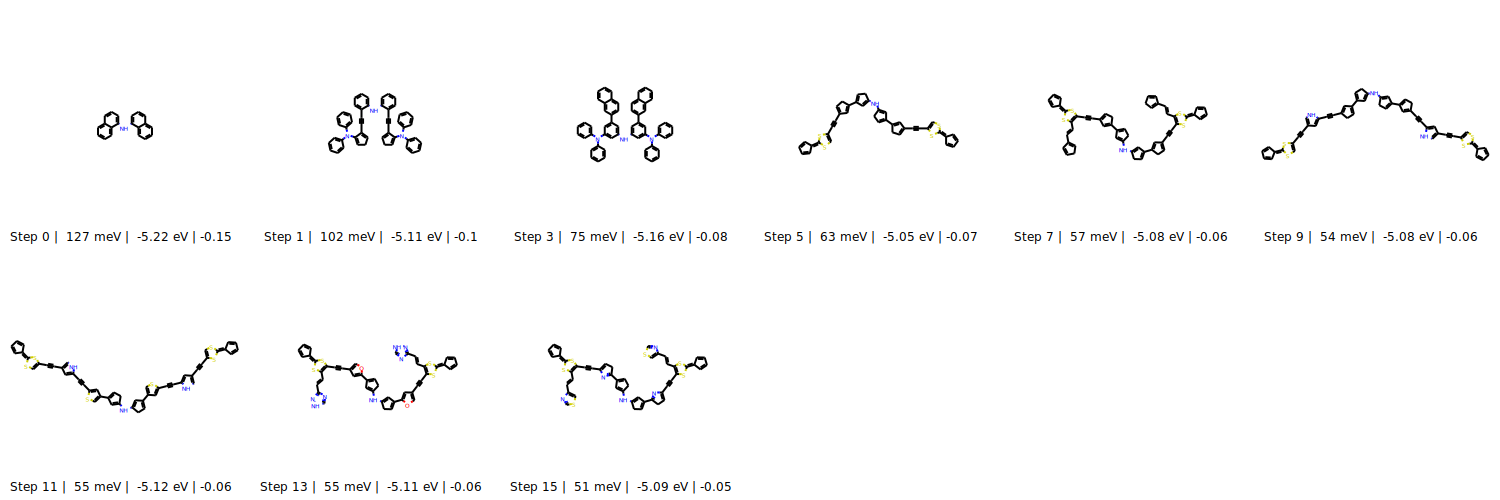

In [11]:
drawOptions=MolDrawOptions()
drawOptions.legendFontSize=14
drawOptions.scaleBondWidth=1

best_mols=[best_mols[i] for i in [0,1,3,5,7,9,11,13,15]]

df_max_mols=df_population_production_SI[df_population_production_SI.molecule_smiles.isin(best_mols)]

svg=_MolsToGridSVG(df_max_mols.ROMol.tolist(),
                         legends=['Step '+str(int(row[1].finished_in_round-1))+' |  '+\
                                          str(round(row[1].XTB1_lamda_h))+' meV'+' |  '+\
                                          str(round(row[1].ehomo_gfn1_b3lyp,2))+' eV'+' | '+\
                                          str(round(row[1].utility_function,2))
                                            for i,row in enumerate(df_max_mols.iterrows())],
                         molsPerRow=6, subImgSize=(250, 250), drawOptions=drawOptions)

with open("main_figures/best_mols_steps_S9.svg", "w") as filex:
    filex.write(svg)
SVG(svg)